In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('F_raud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.shape

(1000, 40)

In [4]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [7]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,NaN
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,NaN
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,NaN
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,NaN
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,NaN
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,NaN
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,NaN
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,NaN
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,NaN
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,NaN


In [10]:
df.columns.tolist()

['months_as_customer',
 'age',
 'policy_number',
 'policy_bind_date',
 'policy_state',
 'policy_csl',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_zip',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'capital-gains',
 'capital-loss',
 'incident_date',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'property_damage',
 'bodily_injuries',
 'witnesses',
 'police_report_available',
 'total_claim_amount',
 'injury_claim',
 'property_claim',
 'vehicle_claim',
 'auto_make',
 'auto_model',
 'auto_year',
 'fraud_reported',
 '_c39']

In [11]:
#dropping unnessary columns

In [12]:
df.drop(columns=["police_report_available","collision_type","property_damage","policy_bind_date",'policy_csl','insured_zip','insured_education_level','insured_occupation', 'insured_occupation','insured_hobbies','insured_relationship', 'incident_date', 'incident_state', 'incident_city', 'incident_type', 'authorities_contacted', 'property_damage', 'injury_claim', 'property_claim', 'vehicle_claim','_c39','policy_bind_date','auto_year'],axis=1,inplace=True)

In [13]:
df.columns.tolist()

['months_as_customer',
 'age',
 'policy_number',
 'policy_state',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_sex',
 'capital-gains',
 'capital-loss',
 'incident_severity',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'auto_make',
 'auto_model',
 'fraud_reported']

In [14]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                    object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
capital-gains                    int64
capital-loss                     int64
incident_severity               object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
auto_make                       object
auto_model                      object
fraud_reported                  object
dtype: object

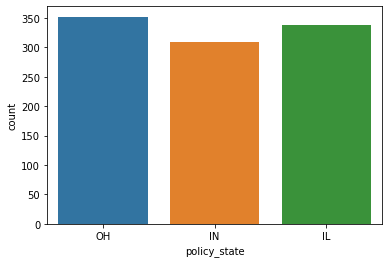

In [15]:
sns.countplot(x ='policy_state', data = df)

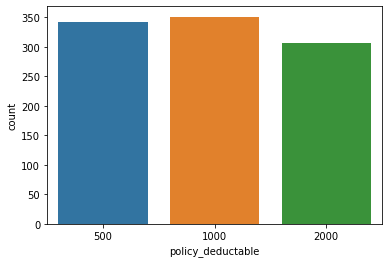

In [16]:
sns.countplot(x ='policy_deductable', data = df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

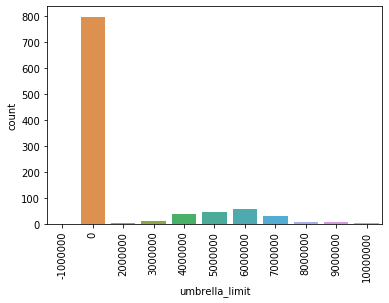

In [17]:
sns.countplot(x ='umbrella_limit', data = df)
plt.xticks(rotation=90)

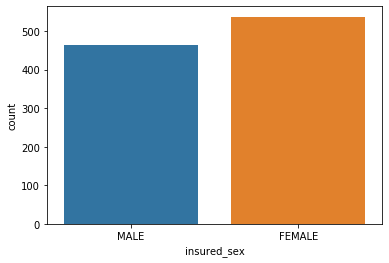

In [18]:
sns.countplot(x ='insured_sex', data = df)

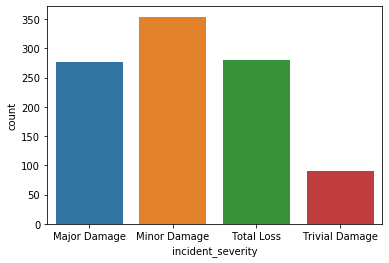

In [19]:
sns.countplot(x ='incident_severity', data = df)

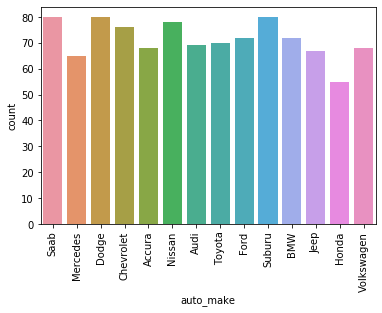

In [20]:
sns.countplot(x ='auto_make', data = df)
plt.xticks(rotation=90)
plt.show()

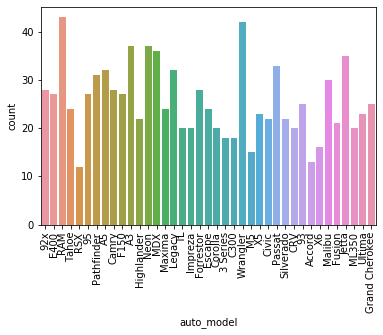

In [21]:
sns.countplot(x ='auto_model', data = df)
plt.xticks(rotation=90)
plt.show()

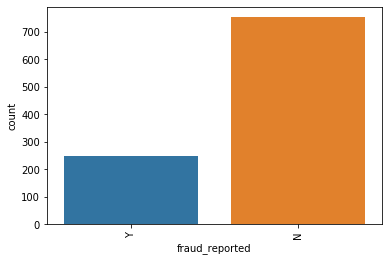

In [22]:
sns.countplot(x ='fraud_reported', data = df)
plt.xticks(rotation=90)
plt.show()

In [23]:
df['fraud_reported']=df['fraud_reported'].map({'N': 0, 'Y': 1})

In [24]:
df.columns.tolist()

['months_as_customer',
 'age',
 'policy_number',
 'policy_state',
 'policy_deductable',
 'policy_annual_premium',
 'umbrella_limit',
 'insured_sex',
 'capital-gains',
 'capital-loss',
 'incident_severity',
 'incident_location',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'auto_make',
 'auto_model',
 'fraud_reported']

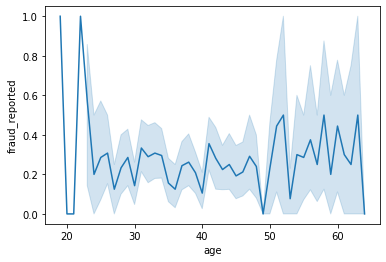

In [25]:
sns.lineplot(x='age',y='fraud_reported',data=df)

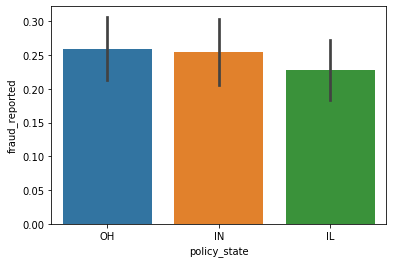

In [26]:
sns.barplot(x='policy_state',y='fraud_reported',data=df)

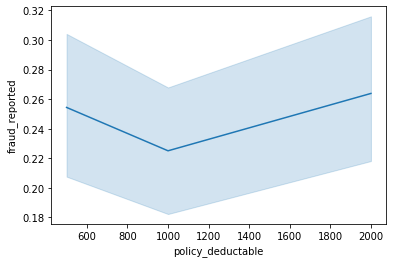

In [27]:
sns.lineplot(x='policy_deductable',y='fraud_reported',data=df)

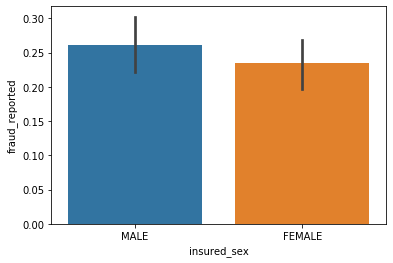

In [28]:
sns.barplot(x='insured_sex',y='fraud_reported',data=df)

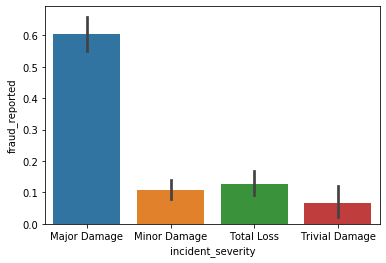

In [29]:
sns.barplot(x='incident_severity',y='fraud_reported',data=df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

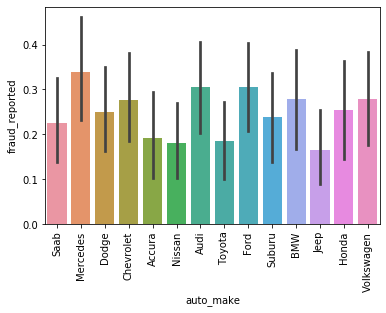

In [30]:
sns.barplot(x='auto_make',y='fraud_reported',data=df)
plt.xticks(rotation=90)

In [31]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_state                    object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
capital-gains                    int64
capital-loss                     int64
incident_severity               object
incident_location               object
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
total_claim_amount               int64
auto_make                       object
auto_model                      object
fraud_reported                   int64
dtype: object

In [32]:
df=pd.get_dummies(df,columns=['policy_state','insured_sex','incident_severity','incident_location','auto_make','auto_model'])

In [33]:
df.isnull().sum()

months_as_customer       0
age                      0
policy_number            0
policy_deductable        0
policy_annual_premium    0
                        ..
auto_model_Tahoe         0
auto_model_Ultima        0
auto_model_Wrangler      0
auto_model_X5            0
auto_model_X6            0
Length: 1076, dtype: int64

In [34]:
X=df.drop('fraud_reported',axis=1)
y=df["fraud_reported"]

In [35]:
X

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,...,auto_model_Pathfinder,auto_model_RAM,auto_model_RSX,auto_model_Silverado,auto_model_TL,auto_model_Tahoe,auto_model_Ultima,auto_model_Wrangler,auto_model_X5,auto_model_X6
0,328,48,521585,1000,1406.91,0,53300,0,5,1,...,0,0,0,0,0,0,0,0,0,0
1,228,42,342868,2000,1197.22,5000000,0,0,8,1,...,0,0,0,0,0,0,0,0,0,0
2,134,29,687698,2000,1413.14,5000000,35100,0,7,3,...,0,1,0,0,0,0,0,0,0,0
3,256,41,227811,2000,1415.74,6000000,48900,-62400,5,1,...,0,0,0,0,0,1,0,0,0,0
4,228,44,367455,1000,1583.91,6000000,66000,-46000,20,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1000,1310.80,0,0,0,20,1,...,0,0,0,0,0,0,0,0,0,0
996,285,41,186934,1000,1436.79,0,70900,0,23,1,...,0,0,0,0,0,0,0,0,0,0
997,130,34,918516,500,1383.49,3000000,35100,0,4,3,...,0,0,0,0,0,0,0,0,0,0
998,458,62,533940,2000,1356.92,5000000,0,0,2,1,...,0,0,0,0,0,0,0,0,0,0


In [36]:
y

0      1
1      1
2      0
3      1
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: fraud_reported, Length: 1000, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [40]:
X_train

array([[ 0.25702384,  0.17272709,  0.73566637, ..., -0.22243035,
        -0.16245911, -0.12635334],
       [-0.88544277, -0.91850904, -0.22961546, ..., -0.22243035,
        -0.16245911, -0.12635334],
       [-0.81567381, -1.02763265,  1.70977113, ..., -0.22243035,
        -0.16245911, -0.12635334],
       ...,
       [ 0.17853377,  0.2818507 , -1.44652592, ..., -0.22243035,
        -0.16245911, -0.12635334],
       [-0.93776948, -1.24587987,  0.99384005, ..., -0.22243035,
        -0.16245911, -0.12635334],
       [ 0.6058686 ,  0.17272709, -0.62588168, ..., -0.22243035,
        -0.16245911, -0.12635334]])

In [41]:
y_train

541    0
440    0
482    1
422    0
778    0
      ..
106    1
270    0
860    0
435    0
102    0
Name: fraud_reported, Length: 700, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve

In [43]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)
acc_score=accuracy_score(pred,y_test)
acc_score

0.7233333333333334

In [44]:
from sklearn.model_selection import GridSearchCV
kn=KNeighborsClassifier()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(kn,parameters)
gd.fit(X_train,y_train)
gd.best_params_

{'n_neighbors': 10}

In [45]:
dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dt,parameters)
gd.fit(X_train,y_train)
gd.best_params_

{'criterion': 'gini'}

In [46]:
from sklearn.model_selection import GridSearchCV
sv=SVC()
parameters={'kernel':('linear','rbf'),'C':[1,10]}
gd=GridSearchCV(sv,parameters)
gd.fit(X_train,y_train)
gd.best_params_

{'C': 1, 'kernel': 'linear'}

In [ ]:
model=[]
score=[]
cvs=[]


for i in [LogisticRegression(),KNeighborsClassifier(n_neighbors=10),DecisionTreeClassifier(criterion='gini'),SVC(C=1,kernel='linear')]:
    k=i
    model.append(i)
    print("\n")
    print("model calculation for ",i,"are:")
    k.fit(X_train,y_train)
    k.score(X_train,y_train)
    pred=k.predict(X_test)
    print(pred)
    AS=accuracy_score(pred,y_test)
    print("accuracy score is",AS)
    score.append(AS)
    cv_score=cross_val_score(k,X,y,cv=5,scoring='accuracy').mean()
    print('cv score is',cv_score)
    cvs.append(cv_score)
    print("")
    cm=confusion_matrix(pred,y_test)
    print(cm)
    print("")
    print(classification_report(pred,y_test))
    print("\n")



model calculation for  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) are:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0]
accuracy score is 0.72333333333333

In [ ]:
#best model is decision tree model

In [ ]:
from sklearn.externals import joblib 
  

joblib.dump(dt, 'fraud.pkl') 
  
dt_from_joblib = joblib.load('fraud.pkl')  
  
